In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfi
%matplotlib inline

## Функция решения дифференциального уравнения

In [3]:
def norm(y, y_pred): # функция для вычсления нормы max|y_i - y(x_i)| i=0...n
    norm = 0
    for i in range(len(y)):
        if np.fabs(y_pred[i] - y[i]) > norm:
            norm = np.fabs(y_pred[i] - y[i])
    return norm

In [4]:
def diff(f, p, q, a, b, a0, b0, a1, b1, A, B, N = 100):
    h = (b - a) / N
    y = np.array([0.0]*(N + 1))
    f1 = np.array([0.0]*(N + 1))
    f2 = np.array([0.0]*(N + 1))
    x = np.array([a + h * i for i in range(N+1)])
    f1[1] = -a1 / (a0 * h - a1)
    f2[1] = A * h / (a0 * h - a1)
    for i in range(1, N):
        k = 1.0 / (h * h) - p(x[i]) / (2.0 * h)
        l = 2.0 / (h * h) - q(x[i])
        m = 1.0 / (h * h) + p(x[i]) / (2.0 * h)
        r = f(x[i])
        f1[i + 1] = m / (l - k * f1[i])
        f2[i + 1] = (f2[i] * k - r) / (l - k * f1[i])
        
    y[N] = (b1 * f2[N] + B * h) / (b1 * (1.0 - f1[N]) + b0 * h)
    
    for i in range(N):
        j = N - i
        y[j - 1] = y[j] * f1[j] + f2[j]
    return x, y

## TEST 1

In [5]:
def ans1(x):
    return (0.661683 - 0.661683*(x**2))*erfi(x/np.sqrt(2.0))  - 1.45132 * (x**2) + (0.527947 * np.exp((x**2)/2.0) + 1)*x + 0.951319


Норма:  0.004280103041253147


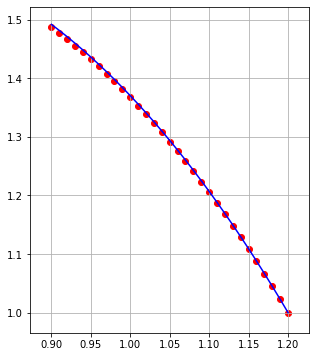

In [6]:
# y"-xy'+2y=x-1
# y(0.9) - 0.5y'(0.9) =2
# y(1.2) = 1
def ans1(x):
    return ((0.661683 - 0.661683*(x**2))*erfi(x/np.sqrt(2.0)) 
            - 1.45132 * (x**2) 
            + (0.527947 * np.exp((x**2)/2.0) + 1)*x 
            + 0.951319)

def f1(x):
    return x - 1

def p1(x):
    return -x

def q1(x):
    return 2

x, y = diff(f1, p1, q1, a=0.9, b=1.2, a0=1.0, b0=1.0,
            a1=-0.5, b1=0.0, A=2, B=1, N=30)

plt.figure(figsize=(5, 6))
plt.grid()
plt.scatter(x, y, color="r")
plt.plot(x, ans1(x), color="b")
print('Норма: ', norm(y, ans1(x)))

# Test 2

Норма:  0.01588159284331314


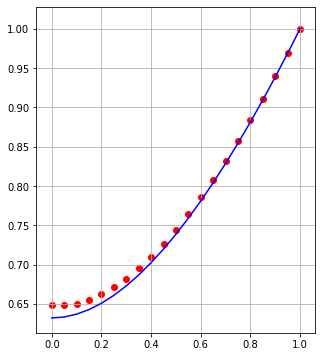

In [7]:
# y′′ + y′ = 1
# y′(0) = 0
# y(1) = 1
def f2(x):
    return 1

def p2(x):
    return 1

def q2(x):
    return 0

def ans2(x):
    return x + np.exp(-x) - np.exp(-1)

x, y = diff(f2, p2, q2, a=0.0, b=1.0, a0=0.0, b0=1.0,
            a1=1.0, b1=0.0, A=0.0, B=1.0, N=20)

plt.figure(figsize=(5, 6))
plt.grid()
plt.scatter(x, y, color="r")
plt.plot(x, ans2(x), color="b")
print('Норма: ', norm(y, ans2(x)))

# Test 3

Норма:  0.018663852669889014


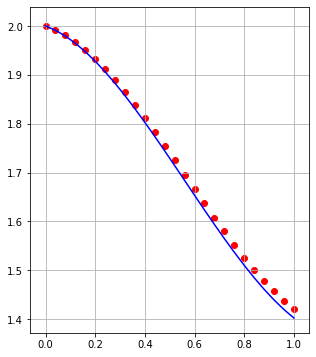

In [8]:
# y'' + y = 3x, y(0) = 2, y(1) + y'(1)=1
def f3(x):
    return 3*x

def p3(x):
    return 0

def q3(x):
    return 1

def ans3(x):
    return (3.0 * x * np.sin(1) + 2.0 * np.sin(1.0 - x) - 5.0 * np.sin(x) + 3.0 * x * np.cos(1.0) 
            + 2.0 * np.cos(1.0 - x))/(np.sin(1.0) + np.cos(1.0))

x, y = diff(f3, p3, q3, a=0.0, b=1.0, a0=1.0, b0=1.0,
            a1=0.0, b1=1.0, A=2.0, B=1.0, N=25)

plt.figure(figsize=(5, 6))
plt.grid()
plt.scatter(x, y, color="r")
plt.plot(x, ans3(x), color="b")
print('Норма: ', norm(y, ans3(x)))

In [10]:
def ans4(x):
    return -0.666667 - (0.0426075 * np.exp(-np.sqrt(3)*x))/x + (0.606253 * np.exp(np.sqrt(3) * x))/x

Норма:  1.2478216542995408


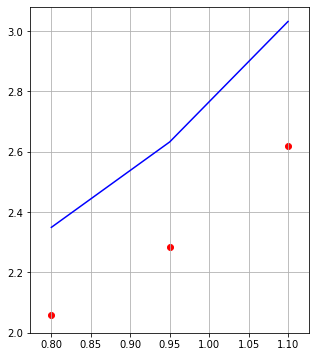

In [11]:
# y'' + 2y' / x - 3y = 2; Условия: y'(0.8) = 1.5, 2y(1.1) - y'(1.1) = 3

def p4(x):
    return 2.0 / x

def q4(x):
    return -3.0

def f4(x):
    return 2.0

# def ans3(x):
#     return (3.0 * x * np.sin(1) + 2.0 * np.sin(1.0 - x) - 5.0 * np.sin(x) + 3.0 * x * np.cos(1.0) 
#             + 2.0 * np.cos(1.0 - x))/(np.sin(1.0) + np.cos(1.0))

x, y = diff(f4, p4, q4, a=0.8, b=1.1, a0=0.0, b0=2.0,
            a1=1.0, b1=-1.0, A=1.5, B=3.0, N=2)

plt.figure(figsize=(5, 6))
plt.grid()
plt.scatter(x, y, color="r")
plt.plot(x, ans4(x), color="b")
print('Норма: ', norm(y, ans3(x)))